In [1]:
#mask warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#get path
import os
import pandas as pd

path = os.getcwd()
path

'/Users/josephbarbier/Desktop/M1S2/bigdata'

In [3]:
#open datasets
train = pd.read_csv(f"{path}/recognizer_train.csv")
print(f"Dimensions du jeu de données d'entraînement : {train.shape}")
train.head()

Dimensions du jeu de données d'entraînement : (37000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#print shapes
y = train.label
X = train.drop("label", axis=1)
print(y.shape, X.shape)

(37000,) (37000, 784)


In [5]:
#print label distribution
indexs = y.value_counts().index
for i in indexs:
    prop = round(y.value_counts()[i]/sum(y.value_counts())*100,2)
    print(f"Proportion de la modalité {i} : {prop}%")

Proportion de la modalité 1 : 11.15%
Proportion de la modalité 3 : 10.51%
Proportion de la modalité 7 : 10.4%
Proportion de la modalité 9 : 10.04%
Proportion de la modalité 2 : 9.98%
Proportion de la modalité 0 : 9.82%
Proportion de la modalité 4 : 9.74%
Proportion de la modalité 6 : 9.73%
Proportion de la modalité 8 : 9.68%
Proportion de la modalité 5 : 8.96%


<br>

#### Display first 10 images

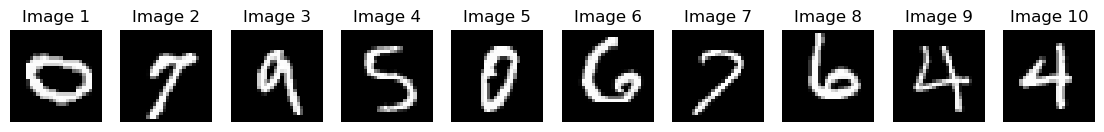

In [30]:
import matplotlib.pyplot as plt
import numpy as np

def display_images(data, n_wanted):
    
    #reshape in 28x28
    images = np.array(data.loc[:n_wanted, :]).reshape(-1,28,28)
    images.shape
    
    #plot
    fig, axes = plt.subplots(nrows=1, ncols=n_wanted, figsize=(14,2))
    for i, ax in enumerate(axes):
        ax.imshow(images[i], cmap="gray")
        ax.set_title(f"Image {i+1}")
        ax.axis("off")
    plt.show
    
display_images(X, 10)

<br>
<br>
<br>
<br>

## Feature engineering

<br>

#### PCA

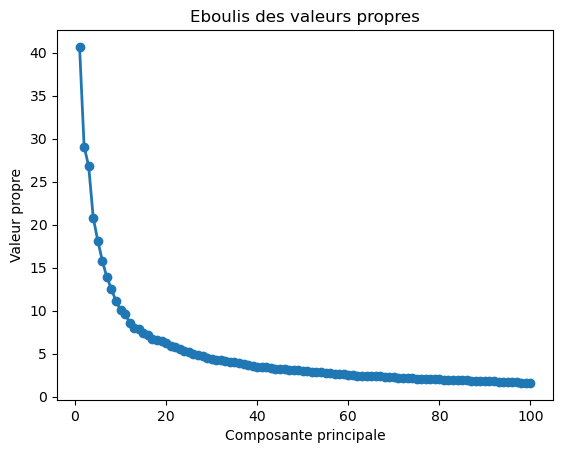

In [7]:
#dimensionnality reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#scale variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#fit the PCA
pca = PCA(n_components=100)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)

#get eigenvalues and explained variance
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

#display scree graph
n_wanted = len(eigenvalues)
plt.plot(np.arange(1, n_wanted+1), eigenvalues[0:n_wanted], 'o-', linewidth=2)
plt.xlabel('Composante principale')
plt.ylabel('Valeur propre')
plt.title('Eboulis des valeurs propres')
plt.show()

<br>
<br>
<br>
<br>

## Model selection

<br>

#### Define a train and validation set

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#non-PCA
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

#PCA
X_train_pca, X_val_pca, y_train_pca, y_val_pca = train_test_split(X_pca, y, test_size=0.3)

<br>

#### Logistic regression

In [9]:
#fit a logistic regression
import statsmodels.api as sm


#model1
model = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results = model.fit()

#test performance
y_pred = results.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"Accuracy (Logistic regression (without pca): {round(acc*100,2)}%")


#model2
model = sm.GLM(y_train_pca, X_train_pca, family=sm.families.Binomial())
results = model.fit()

#test performance
y_pred = results.predict(X_val_pca)
acc = accuracy_score(y_val_pca, y_pred)
print(f"Accuracy (Logistic regression (with pca): {round(acc*100,2)}%")

KeyboardInterrupt: 

<br>

#### Random forest classifier

In [10]:
#fit a random forest classifier
from sklearn.ensemble import RandomForestClassifier


#model1
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)

#test performance
y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"Accuracy Random Forest (without pca): {round(acc*100,2)}%")


#model2
model = RandomForestClassifier(random_state=0)
model.fit(X_train_pca, y_train_pca)

#test performance
y_pred = model.predict(X_val_pca)
acc = accuracy_score(y_val_pca, y_pred)
print(f"Accuracy Random Forest (with pca): {round(acc*100,2)}%")

Accuracy Random Forest (without pca): 95.77%
Accuracy Random Forest (with pca): 93.62%


<br>

#### Kneighbors classifier

In [11]:
#fit a Kneighbors classifier
from sklearn.neighbors import KNeighborsClassifier


#model1
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train_pca, y_train_pca)

#test performance
y_pred = model.predict(X_val_pca)
acc = accuracy_score(y_val_pca, y_pred)
print(f"Accuracy Kneighbors classifier (with pca): {round(acc*100,2)}% (with {4} neighbors)")


#model2
model = KNeighborsClassifier(n_neighbors=i)
model.fit(X_train, y_train)

#test performance
y_pred = model.predict(X_val)
acc = accuracy_score(y_val, y_pred)
print(f"Accuracy Kneighbors classifier (without pca): {round(acc*100,2)}% (with {4} neighbors)")

Accuracy Kneighbors classifier (with pca): 94.78% (with 4 neighbors)
Accuracy Kneighbors classifier (without pca): 96.19% (with 4 neighbors)


<br>
<br>
<br>
<br>

## Define submission

In [12]:
test = pd.read_csv(f"{path}/recognizer_test.csv")
print(f"Dimensions du jeu de données de test : {test.shape}")
test.head()

Dimensions du jeu de données de test : (5000, 784)



,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
submission_pred = pd.Series(model.predict(test))
submission_pred.to_csv("barbier_beltran_devoir1.csv", index=False)

<br>
<br>
<br>
<br>

## Test de la performance de la prédiction sur le test set

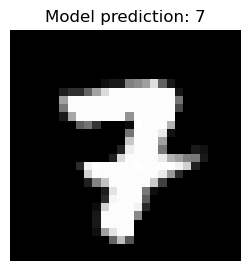

In [146]:
import matplotlib.pyplot as plt
import numpy as np
import random

def display_random_image(data):
    
    #choose a random row and save it
    loc = random.randint(0, len(data))
    
    #reshape in 28x28 the located row
    images = np.array(data.loc[loc, :]).reshape(28,28)
    
    #define the subplots size
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
    axes.imshow(images, cmap="gray")
    
    #compute the prediction of the chosen model for this row
    pred = model.predict(np.array(test.loc[loc,:]).reshape(1, -1))[0]
    
    #add title and remove axis
    axes.set_title(f"Model prediction: {pred}")
    axes.axis("off")
    
    #plot the image
    plt.show
    
display_random_image(test)